<a href="https://colab.research.google.com/github/MohammedBaz/MusicGAN/blob/main/MusicMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing lilypond...
Extracting templates from packages: 100%
installing fluidsynth...
done!
<music21.chord.Chord G#4 C#9>


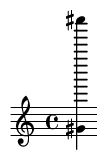

{0.0} <music21.instrument.Dulcimer Dulcimer>
{0.0} <music21.note.Note F#>
{1.3333} <music21.note.Note F>
{5.3333} <music21.note.Note A>
{5.7083} <music21.note.Note G#>
{9.2083} <music21.note.Note E->
{12.2083} <music21.note.Note B->
{15.7083} <music21.note.Note E->
{19.2083} <music21.note.Note G>
{19.9583} <music21.note.Note G>
{20.9583} <music21.note.Note E>


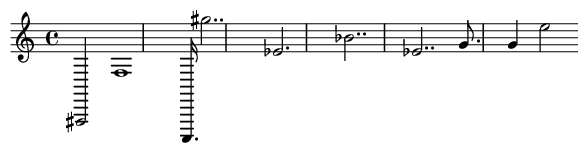

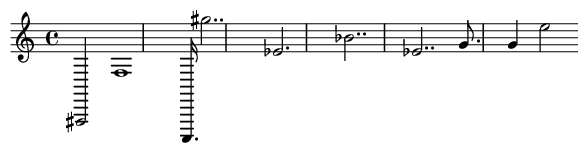

In [1]:
def LibraryforPrintandPlayMusic():
  print('installing lilypond...')
  !apt-get install lilypond > /dev/null
  # converts midi files to wav files into order to play them
  print('installing fluidsynth...')
  !apt-get install fluidsynth > /dev/null
  !cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
  print('done!')

def show(music):
  display(Image(str(music.write('lily.png'))))

def play(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  display(Audio(filename + '.wav'))

def CreateNewNote(UsingMidiNumber,withduration,SpecificInstrument=None):
  #The main responsbility of this function is to generate a random note by setting  each of its attribute to a value within corrosping range:
  if (not (UsingMidiNumber)): # a note can be generated etiher by setting its midi number (an integer number within[0-127]) or musical symbols (e.g.,C#1) 
    randomNote=music21.note.Note(choice(GetPossibleNotenameWithOctave())) #to get a list of all musical symbols we write a function to iterate through all 
  else:                                                                   #notes and all instrument and them choise one of these list randomly.  
    randomNote=music21.note.Note(randint(0,127))                                                                                                                   
  if (withduration):
    randomNote.duration.quarterLength=GetPossibleDuration() #set the duration in quarter length
  randomNote.volume=127 #MIDI volume is the loudness of the entire instrument, while velocity is how hard a note is hit.
  randomNote.velocity=127 #here I set the values of both volume and velocity to the maximum values =127.
  if SpecificInstrument is not None:
    randomNote.midiProgram=choice(GetInstrmentInformation(True)) #set the insrument type  
  return(randomNote) 

def GetInstrmentInformation(gettheNumber):
  InstrumentName=[]
  InstrumentNumber=[]
  InstrumentNumberandName=[[]]
  for i in range (127): 
    try:# Not all numbers from 0 -127 can be used as instrument id, for exmple 2 gives error.
        #Morover some instrunment has more than id, e.g., Piano has 6 ids {0,2,3,4,5,6}
      bcl = music21.instrument.instrumentFromMidiProgram(i)
      InstrumentName.append(bcl.instrumentName)
      InstrumentNumber.append(i)
      InstrumentNumberandName.append([i, bcl.instrumentName])
    except:
      i=i+1
  if (gettheNumber):
    return(InstrumentNumber)
  else:
    return(InstrumentName)

def GetPossibleNotenameWithOctave():
  listofInstrumentNos=GetInstrmentInformation(False)
  PossibleNotenameWithOctave=[]
  for i in range(127):
    notex=music21.note.Note(midi=i)
    for instrumentid in listofInstrumentNos:
      notex.midiProgram=instrumentid
      PossibleNotenameWithOctave.append(notex.nameWithOctave)
  return(numpy.unique(PossibleNotenameWithOctave))

def GetPossibleDuration():
  PossibleDuration=[4.0,3.0,3.5,2.0,4.0/3.0,1.0,2.0/3.0,1.5,1.75,0.5,0.75,1.0/3.0,
                    0.875,0.25,0.375,1.0/6.0,0.125,1.0/12.0] # this list in quarter lenght noation
  return(choice(PossibleDuration))


from IPython.display import Image, Audio,clear_output
import numpy
import music21
from random import randint, choice
LibraryforPrintandPlayMusic()

#CreateNewNote function generates a new random note, 
#several notes played together forms chrod, they can created by assing a single duration for several notes:
newchord=music21.chord.Chord()
for i in range(2):
  newchord.add(CreateNewNote(True,False,False))
newchord.duration.quarterLength=GetPossibleDuration()
newchord.show('text')
show(newchord)
play(newchord)

#The second top level of musical objects is parts: it is several notes/chrod with the same instruments
#According to my best of knowlege there is no part object in music21, so I use stream
newstream=music21.stream.Stream()
newstream.append(music21.instrument.instrumentFromMidiProgram(15))
for i in range(10):
  newstream.append(CreateNewNote(True,True,None))
newstream.show('text')
play(newstream)
show(newstream)

#Finally, the Score is multiple stream with the same tempo:
newscore=newstream
newscore.append(music21.tempo.MetronomeMark(number=60)) #tempo is the number of beats per minutes
play(newstream)
show(newstream)

##############################################################################
#######several other functions need to be implmeneted ########################
#1- shiting in time 
#2- reversing the order of note (retrograde) 
#3- Inversion-mirroing the note around a pivot note 
#4- Augmentation (streting the duration of notes)
#5- Diminuation (shrinking the duration of notes)
#6- Musical Canon
#7- Shift the notes to other ocatve, adding or subtract 12 from midi numbers
#8-
